# Item Price Analysis in the Middle East
#### Data Source: https://data.humdata.org/dataset/wfp-food-prices

We will import data in csv format from WFP's site and take a look at the changes in price of essential items(food, energy, hygiene) and see if the whole region is undergoing the same price inflation and economic collapse or not.
It certainly feels like it, so let's see if it's true in numbers.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
wfp_data = pd.read_csv(r'wfp_foodprices.csv')

In [3]:
wfp_data.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


In [4]:
# Which countries are present
wfp_data.adm0_name.unique()

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Bassas da India', 'Belarus', 'Benin',
       'Bhutan', 'Bolivia', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad',
       'China', 'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Democratic Republic of the Congo', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea',
       'Ethiopia', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Indonesia',
       'Iran  (Islamic Republic of)', 'Iraq', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Lebanon', 'Lesotho',
       'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mexico', 'Moldova Republic of', 'Mongolia', 'Mozambique',
       'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria',
  

### I'm interested in Lebanon, Iraq, Syria, Iran

In [5]:
local = ['Lebanon', 'Iraq', 'Syrian Arab Republic', 'Iran  (Islamic Republic of)']

In [6]:
local_data = wfp_data[wfp_data['adm0_name'].isin(local)]
local_data.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
748139,117.0,Iran (Islamic Republic of),1560,Tehran,1652,Tehran Market,71,Rice (local) - Retail,0.0,IRR,15,Retail,5,KG,4,2012,26860.0,NaN
748140,117.0,Iran (Islamic Republic of),1560,Tehran,1652,Tehran Market,71,Rice (local) - Retail,0.0,IRR,15,Retail,5,KG,5,2012,27000.0,NaN
748141,117.0,Iran (Islamic Republic of),1560,Tehran,1652,Tehran Market,71,Rice (local) - Retail,0.0,IRR,15,Retail,5,KG,6,2012,27000.0,NaN
748142,117.0,Iran (Islamic Republic of),1560,Tehran,1652,Tehran Market,71,Rice (local) - Retail,0.0,IRR,15,Retail,5,KG,7,2012,27000.0,NaN
748143,117.0,Iran (Islamic Republic of),1560,Tehran,1652,Tehran Market,71,Rice (local) - Retail,0.0,IRR,15,Retail,5,KG,8,2012,27000.0,NaN


In [7]:
local_data.shape

(180654, 18)

In [8]:
# Market (source) names
local_data.mkt_name.unique()

array(['Tehran Market', 'National Average', 'Anbar', 'Basrah', 'Muthanna',
       'Qadisiya', 'Najaf', 'Erbil', 'Kirkuk', 'Babylon', 'Baghdad',
       'Thi-Qar', 'Dohuk', 'Diyala', 'Kerbela', 'Maysan', 'Nainawa',
       'Salah al-deen', 'Sulaimaniyah', 'Wasit', 'Baalbeck', 'Hermel',
       'Rashaya', 'West Beqaa', 'Zahle', 'Beirut', 'Akkar', 'Batroun',
       'Bechare', 'Koura', 'Minieh-Dannieh', 'Tripoli', 'Zgharta',
       'Jezzine', 'Saida', 'Sour', 'Aley', 'Baabda', 'Chouf', 'El Metn',
       'Jbeil', 'Keserwan', 'Bint Jbeil', 'Hasbaya', 'Marjayoun',
       'Nabatiyeh', 'Khan Arnaba', 'Rafid', 'Al Fiq', 'Sayda', 'Al Kom',
       'Sweiseh', 'Aleppo', 'Menbij', 'Al Bab', 'Moghambo', "Al-Cha'ar",
       'Nubul', "A'zaz", 'Afrin', 'As-Safira', 'Atareb', 'Der Hafir',
       'Al Hamdaneya', 'Maskanah', 'Shahba', 'As-Sweida', 'Salkhad',
       'Qarraya', "Sheikh Sa'ad", 'Zablatani', 'Shrebishat', 'Damascus',
       'Al Midan', 'Qudsiya', 'Hajar Aswad', 'Duma', 'Jaramana',
       'At-Tall'

In [9]:
# what is the sale type used
local_data.pt_name.unique()

array(['Retail', 'Wholesale'], dtype=object)

In [10]:
# What are the measurment units used
local_data.um_name.unique()

array(['KG', '1.8 KG', 'L', 'Unit', 'Day', 'Cylinder', 'USD/LCU', '4 pcs',
       'Packet', '150 ml', '30 pcs', '5 L', '900 G', '20 L', '1.3 KG',
       'Head', '160 G', '200 G', '125 G', '185 G', '10 KG', 'MT',
       '1.1 KG', '650 G', '25 KG', '1.5 L', '28 pcs', '900 ML', '10 pcs',
       '100 ML', 'Course', 'Bar', '200 ML', '1 piece', '50 ML', 'Pair',
       '1 GB', 'Cubic meter'], dtype=object)

In [11]:
# What are the products used
local_data.cm_name.unique()

array(['Rice (local) - Retail', 'Eggs - Retail',
       'Oil (vegetable) - Retail', 'Sugar - Retail', 'Lentils - Retail',
       'Rice - Retail', 'Wheat flour - Retail', 'Bread (khoboz) - Retail',
       'Beans (white) - Retail', 'Milk - Retail', 'Potatoes - Retail',
       'Meat (chicken) - Retail', 'Tomatoes - Retail', 'Fish - Retail',
       'Meat (beef) - Retail', 'Onions - Retail',
       'Milk (powder) - Retail', 'Chickpeas - Retail', 'Bulgur - Retail',
       'Wage (non-qualified labour) - Retail', 'Tea - Retail',
       'Fuel (kerosene) - Retail', 'Fuel (petrol-gasoline) - Retail',
       'Dates - Retail', 'Cheese (local) - Retail',
       'Salt (iodised) - Retail', 'Fuel (gas) - Retail',
       'Meat (lamb) - Retail', 'Exchange rate (unofficial) - Retail',
       'Toothbrush - Retail', 'Sanitary pads - Retail',
       'Toothpaste - Retail', 'Handwash soap - Retail',
       'Shampoo - Retail', 'Disinfecting solution - Retail',
       'Cabbage - Retail', 'Oil (sunflower) - Retai

### Let's focus on the Retail prices

In [12]:
# Let's first analyse retail prices
local_data = local_data[local_data['pt_name'] == 'Retail']
local_data.shape

(177273, 18)

In [13]:
local_data.isnull().sum()

adm0_id                    0
adm0_name                  0
adm1_id                    0
adm1_name              67750
mkt_id                     0
mkt_name                   0
cm_id                      0
cm_name                    0
cur_id                     0
cur_name                   0
pt_id                      0
pt_name                    0
um_id                      0
um_name                    0
mp_month                   0
mp_year                    0
mp_price                   0
mp_commoditysource    177273
dtype: int64

In [14]:
local_data = local_data[['adm0_id', 'adm0_name', 'cm_name', 'cur_name', 'um_id', 'um_name', 'mp_month', 'mp_year', 'mp_price']]
local_data.head()

,adm0_id,adm0_name,cm_name,cur_name,um_id,um_name,mp_month,mp_year,mp_price
748139,117.0,Iran (Islamic Republic of),Rice (local) - Retail,IRR,5,KG,4,2012,26860.0
748140,117.0,Iran (Islamic Republic of),Rice (local) - Retail,IRR,5,KG,5,2012,27000.0
748141,117.0,Iran (Islamic Republic of),Rice (local) - Retail,IRR,5,KG,6,2012,27000.0
748142,117.0,Iran (Islamic Republic of),Rice (local) - Retail,IRR,5,KG,7,2012,27000.0
748143,117.0,Iran (Islamic Republic of),Rice (local) - Retail,IRR,5,KG,8,2012,27000.0


In [15]:
local_data.columns = ['country_id', 'country_name', 'product_name', 'cur_id', 'cur_name', 'um_name', 'month', 'year', 'price']
local_data.head()

,country_id,country_name,product_name,cur_id,cur_name,um_name,month,year,price
748139,117.0,Iran (Islamic Republic of),Rice (local) - Retail,IRR,5,KG,4,2012,26860.0
748140,117.0,Iran (Islamic Republic of),Rice (local) - Retail,IRR,5,KG,5,2012,27000.0
748141,117.0,Iran (Islamic Republic of),Rice (local) - Retail,IRR,5,KG,6,2012,27000.0
748142,117.0,Iran (Islamic Republic of),Rice (local) - Retail,IRR,5,KG,7,2012,27000.0
748143,117.0,Iran (Islamic Republic of),Rice (local) - Retail,IRR,5,KG,8,2012,27000.0


In [16]:
local_data.reset_index(inplace = True)
local_data.head()

,index,country_id,country_name,product_name,cur_id,cur_name,um_name,month,year,price
0,748139,117.0,Iran (Islamic Republic of),Rice (local) - Retail,IRR,5,KG,4,2012,26860.0
1,748140,117.0,Iran (Islamic Republic of),Rice (local) - Retail,IRR,5,KG,5,2012,27000.0
2,748141,117.0,Iran (Islamic Republic of),Rice (local) - Retail,IRR,5,KG,6,2012,27000.0
3,748142,117.0,Iran (Islamic Republic of),Rice (local) - Retail,IRR,5,KG,7,2012,27000.0
4,748143,117.0,Iran (Islamic Republic of),Rice (local) - Retail,IRR,5,KG,8,2012,27000.0


In [17]:
local_data.drop('index', axis = 1, inplace = True)
local_data

,country_id,country_name,product_name,cur_id,cur_name,um_name,month,year,price
0,117.0,Iran (Islamic Republic of),Rice (local) - Retail,IRR,5,KG,4,2012,26860.0
1,117.0,Iran (Islamic Republic of),Rice (local) - Retail,IRR,5,KG,5,2012,27000.0
2,117.0,Iran (Islamic Republic of),Rice (local) - Retail,IRR,5,KG,6,2012,27000.0
3,117.0,Iran (Islamic Republic of),Rice (local) - Retail,IRR,5,KG,7,2012,27000.0
4,117.0,Iran (Islamic Republic of),Rice (local) - Retail,IRR,5,KG,8,2012,27000.0
...,...,...,...,...,...,...,...,...,...
177268,238.0,Syrian Arab Republic,Hand sanitizer (gel) - Retail,SYP,166,50 ML,5,2021,1000.0
177269,238.0,Syrian Arab Republic,Plastic gloves - Retail,SYP,167,Pair,5,2021,600.0
177270,238.0,Syrian Arab Republic,Internet bundle - Retail,SYP,168,1 GB,5,2021,2750.0
177271,238.0,Syrian Arab Republic,"Fuel (diesel, heating, parallel market) - Retail",SYP,15,L,5,2021,1650.0


In [18]:
# Change the names of these countries for easier access
local_data['country_name'] = local_data['country_name'].str.replace(r'Syrian Arab Republic', 'Syria')
local_data['country_name'] = local_data['country_name'].str.replace(r'Iran\s\s[(]\w+\s\w+\s\w+[)]', 'Iran')

In [19]:
local_data.country_name.unique()

array(['Iran', 'Iraq', 'Lebanon', 'Syria'], dtype=object)

In [20]:
# What are the currencies?
local_data.cur_id.unique()

array(['IRR', 'IQD', 'LBP', 'SYP'], dtype=object)

In [21]:
# Exchange all prices to their equivalent in USD
price_lst = []
price = ''
for i,cur in enumerate(local_data['cur_id']):
    
    if cur == 'IRR':
        price = local_data.iloc[i]['price']*0.000024
        price_lst.append(price)
    if cur == 'IQD':
        price = local_data.iloc[i]['price']*0.00068
        price_lst.append(price)
    if cur == 'LBP':
        price = local_data.iloc[i]['price']*0.00066
        price_lst.append(price)
    if cur == 'SYP':
        price = local_data.iloc[i]['price']* 0.000795
        price_lst.append(price)
        
local_data['dollar_price'] = price_lst

In [22]:
local_data.head(20)

,country_id,country_name,product_name,cur_id,cur_name,um_name,month,year,price,dollar_price
0,117.0,Iran,Rice (local) - Retail,IRR,5,KG,4,2012,26860.0,0.64464
1,117.0,Iran,Rice (local) - Retail,IRR,5,KG,5,2012,27000.0,0.64800
2,117.0,Iran,Rice (local) - Retail,IRR,5,KG,6,2012,27000.0,0.64800
3,117.0,Iran,Rice (local) - Retail,IRR,5,KG,7,2012,27000.0,0.64800
4,117.0,Iran,Rice (local) - Retail,IRR,5,KG,8,2012,27000.0,0.64800
5,117.0,Iran,Rice (local) - Retail,IRR,5,KG,9,2012,27000.0,0.64800
6,117.0,Iran,Rice (local) - Retail,IRR,5,KG,10,2012,32250.0,0.77400
7,117.0,Iran,Rice (local) - Retail,IRR,5,KG,11,2012,36660.0,0.87984
8,117.0,Iran,Rice (local) - Retail,IRR,5,KG,12,2012,36420.0,0.87408
9,117.0,Iran,Rice (local) - Retail,IRR,5,KG,1,2013,39810.0,0.95544


In [23]:
# What are the products?
local_data.product_name.unique()

array(['Rice (local) - Retail', 'Eggs - Retail',
       'Oil (vegetable) - Retail', 'Sugar - Retail', 'Lentils - Retail',
       'Rice - Retail', 'Wheat flour - Retail', 'Bread (khoboz) - Retail',
       'Beans (white) - Retail', 'Milk - Retail', 'Potatoes - Retail',
       'Meat (chicken) - Retail', 'Tomatoes - Retail', 'Fish - Retail',
       'Meat (beef) - Retail', 'Onions - Retail',
       'Milk (powder) - Retail', 'Chickpeas - Retail', 'Bulgur - Retail',
       'Wage (non-qualified labour) - Retail', 'Tea - Retail',
       'Fuel (kerosene) - Retail', 'Fuel (petrol-gasoline) - Retail',
       'Dates - Retail', 'Cheese (local) - Retail',
       'Salt (iodised) - Retail', 'Fuel (gas) - Retail',
       'Meat (lamb) - Retail', 'Exchange rate (unofficial) - Retail',
       'Toothbrush - Retail', 'Sanitary pads - Retail',
       'Toothpaste - Retail', 'Handwash soap - Retail',
       'Shampoo - Retail', 'Disinfecting solution - Retail',
       'Cabbage - Retail', 'Oil (sunflower) - Retai

### Let's group items by Food, Energy, Hygiene

In [24]:
food = ['Rice (local) - Retail', 'Eggs - Retail',
       'Oil (vegetable) - Retail', 'Sugar - Retail', 'Lentils - Retail',
       'Rice - Retail', 'Wheat flour - Retail', 'Bread (khoboz) - Retail',
       'Beans (white) - Retail', 'Milk - Retail', 'Potatoes - Retail',
       'Meat (chicken) - Retail', 'Tomatoes - Retail', 'Fish - Retail',
       'Meat (beef) - Retail', 'Onions - Retail',
       'Milk (powder) - Retail', 'Chickpeas - Retail', 'Bulgur - Retail',
       'Tea - Retail','Dates - Retail', 'Cheese (local) - Retail',
       'Salt (iodised) - Retail','Meat (lamb) - Retail',      
       'Cabbage - Retail', 'Oil (sunflower) - Retail', 'Salt - Retail',
       'Cucumbers (greenhouse) - Retail',
       'Rice (imported, Egyptian) - Retail', 'Tomatoes (paste) - Retail',
       'Lettuce - Retail', 'Cheese (picon) - Retail',
       'Meat (beef, canned) - Retail', 'Fish (sardine, canned) - Retail',
       'Fish (tuna, canned) - Retail', 'Sugar (white) - Retail',
       'Bread (pita) - Retail', 'Spinach - Retail',
       'Bulgur (brown) - Retail',
       'Meat (chicken, whole, frozen) - Retail',
       'Lentils (green) - Retail', 'Lentils (red) - Retail',
       'Pasta (spaghetti) - Retail', 'Lentils (brown) - Retail',
       'Pasta - Retail','Oil - Retail', 'Carrots - Retail', 'Peanut - Retail',
       'Wheat flour (local) - Retail', 'Meat (beef, minced) - Retail',
       'Meat (chicken, plucked) - Retail', 'Bananas - Retail',
       'Bread (bakery) - Retail', 'Bread (shop) - Retail',
       'Apples - Retail', 'Labaneh - Retail', 'Yogurt - Retail', 'Cucumbers - Retail',
       'Pumpkin - Retail', 'Cheese - Retail', 'Eggplants - Retail',
       'Milk (cow, fresh) - Retail', 'Parsley - Retail', 'Yeast - Retail',
       'Water (drinking) - Retail', 'Meat (chicken, legs) - Retail',
       'Noodles (instant, indomie) - Retail','Bread (bakery, parallel market) - Retail',
       'Maize (local) - Retail', 'Beans (red) - Retail', 'Wheat - Retail',
       'Chili (green) - Retail', 'Garlic - Retail',
       'Ghee (artificial) - Retail', 'Cheese (dry) - Retail',
       'Beans (kidney) - Retail', 'Peas (yellow) - Retail',
       'Peas (green, dry) - Retail', 'Onions (dry, local) - Retail',
       'Meat (sheep) - Retail']

In [25]:
energy = ['Fuel (kerosene) - Retail', 'Fuel (petrol-gasoline) - Retail', 'Fuel (gas) - Retail', 'Fuel (diesel) - Retail',
         'Fuel (petrol-gasoline, 95 octane) - Retail', 'Fuel (gas, parallel market) - Retail',
         'Transport (public, bus) - Retail', 'Fuel (diesel, heating, parallel market) - Retail',
       'Fuel (diesel, transport, parallel market) - Retail']

In [26]:
hygiene = ['Toothbrush - Retail', 'Sanitary pads - Retail',
       'Toothpaste - Retail', 'Handwash soap - Retail',
       'Shampoo - Retail', 'Disinfecting solution - Retail',  'Diapers - Retail','Dishwashing liquid - Retail',
       'Multipurpose soap - Retail', 'Alcohol (spray) - Retail', 'Bleach (chlorine) - Retail', 'Surgical mask - Retail',
       'Hand sanitizer (gel) - Retail', 'Plastic gloves - Retail']

## Food Items Analysis

In [27]:
food_data = local_data[local_data['product_name'].isin(food)]
food_data = food_data[['country_name', 'product_name', 'month', 'year', 'dollar_price']]
food_data

,country_name,product_name,month,year,dollar_price
0,Iran,Rice (local) - Retail,4,2012,0.64464
1,Iran,Rice (local) - Retail,5,2012,0.64800
2,Iran,Rice (local) - Retail,6,2012,0.64800
3,Iran,Rice (local) - Retail,7,2012,0.64800
4,Iran,Rice (local) - Retail,8,2012,0.64800
...,...,...,...,...,...
177253,Syria,Parsley - Retail,5,2021,0.19875
177255,Syria,Water (drinking) - Retail,5,2021,0.39750
177260,Syria,Pasta (spaghetti) - Retail,5,2021,2.98125
177263,Syria,"Meat (chicken, legs) - Retail",5,2021,7.15500


In [28]:
# Create datetime column
food_data['date'] = pd.to_datetime(food_data[['month', 'year']].assign(DAY=1))

In [29]:
# Group by date to get the mean of prices from all of the countries
avg_food_local = food_data.groupby('date').agg({'dollar_price': 'mean'})
avg_food_local

,dollar_price
date,
2011-04-01,0.054578
2011-05-01,0.053968
2011-06-01,0.051209
2011-07-01,0.051398
2011-08-01,0.054048
...,...
2021-02-01,2.986095
2021-03-01,3.423568
2021-04-01,4.969221


In [30]:
# Apply moving average to reduce noise 
avg_food_local['moving_average'] = avg_food_local['dollar_price'].rolling(window = 5).mean()
# Delete na values that arise from rolling
avg_food_local.dropna(inplace = True)

### Plotting the mean of all countries

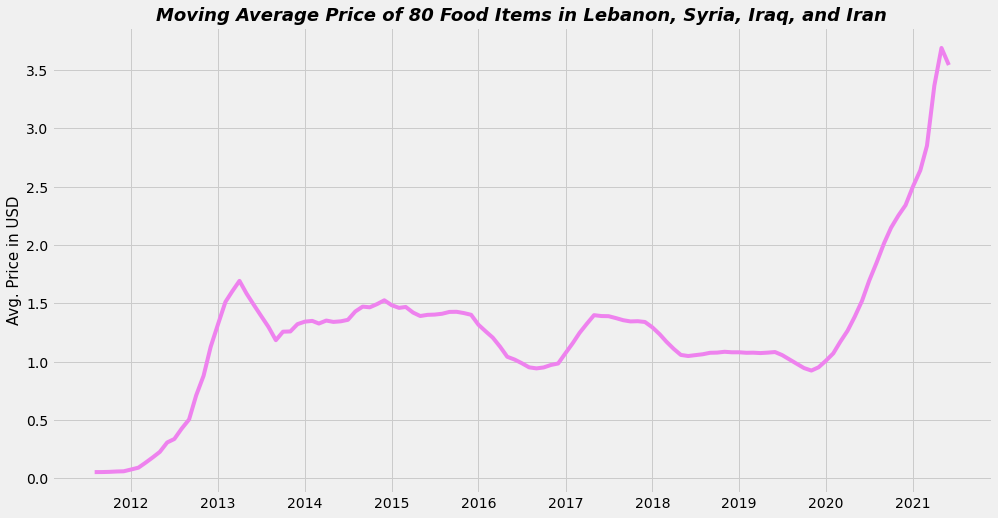

In [31]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))
plt.plot(avg_food_local['moving_average'], color = 'violet')
plt.title('Moving Average Price of 80 Food Items in Lebanon, Syria, Iraq, and Iran', fontname= 'sans-serif', fontsize=18,
            fontstyle='italic', fontweight='bold')
plt.ylabel('Avg. Price in USD', fontsize = 15)
plt.savefig(r'total_food_prices.jpeg', quality = 95)
plt.show()

### Anaylzing the food data for individual countries

In [32]:
iran_food_data    = food_data[food_data['country_name'] == 'Iran']
lebanon_food_data = food_data[food_data['country_name'] == 'Lebanon']
iraq_food_data    = food_data[food_data['country_name'] == 'Iraq']
syria_food_data   = food_data[food_data['country_name'] == 'Syria']

In [33]:
lebanon_food_data

,country_name,product_name,month,year,dollar_price,date
25454,Lebanon,Wheat flour - Retail,1,2015,0.682157,2015-01-01
25455,Lebanon,Wheat flour - Retail,2,2015,0.790614,2015-02-01
25456,Lebanon,Wheat flour - Retail,3,2015,0.642180,2015-03-01
25457,Lebanon,Wheat flour - Retail,4,2015,0.763510,2015-04-01
25458,Lebanon,Wheat flour - Retail,5,2015,0.907500,2015-05-01
...,...,...,...,...,...,...
68167,Lebanon,Lentils (brown) - Retail,6,2018,1.471800,2018-06-01
68168,Lebanon,Lentils (brown) - Retail,7,2018,1.483020,2018-07-01
68169,Lebanon,Lentils (brown) - Retail,8,2018,1.607760,2018-08-01
68170,Lebanon,Lentils (brown) - Retail,9,2018,1.604460,2018-09-01


In [34]:
# Aggregate means for each country
iran_food_data    = iran_food_data.groupby('date').agg({'dollar_price' : 'mean'})
lebanon_food_data = lebanon_food_data.groupby('date').agg({'dollar_price' : 'mean'})
iraq_food_data    = iraq_food_data.groupby('date').agg({'dollar_price' : 'mean'})
syria_food_data   = syria_food_data.groupby('date').agg({'dollar_price' : 'mean'})

In [35]:
# Function to create a moving average column and deleting na values
def moving_avg(dataframe):
    dataframe['moving_average'] = dataframe['dollar_price'].rolling(window = 5).mean()
    dataframe.dropna(inplace = True)
    return dataframe

In [36]:
# Apply moving avg to all countries
moving_avg(lebanon_food_data)
moving_avg(syria_food_data)
moving_avg(iraq_food_data)
moving_avg(iran_food_data)

,dollar_price,moving_average
date,,
2012-08-01,0.722400,0.711341
2012-09-01,0.851328,0.735965
2012-10-01,0.910608,0.781920
2012-11-01,1.027248,0.850694
2012-12-01,0.963504,0.895018
...,...,...
2021-02-01,5.529600,4.929696
2021-03-01,6.105600,5.246400
2021-04-01,5.865600,5.486400


In [37]:
# Drop the dollar_price column and rename the moving average column to merge them together
lebanon_food_data.drop(columns = ['dollar_price'], axis = 1 , inplace = True)
lebanon_food_data.columns      = ['leb_moving_average']
syria_food_data.drop(columns = ['dollar_price'], axis = 1 , inplace = True)
syria_food_data.columns = ['syr_moving_average']
iraq_food_data.drop(columns = ['dollar_price'], axis = 1 , inplace = True)
iraq_food_data.columns = ['irq_moving_average']
iran_food_data.drop(columns = ['dollar_price'], axis = 1 , inplace = True)
iran_food_data.columns = ['irn_moving_average']

In [38]:
# Create a new df and populate it with the country values
ma_food_data = pd.DataFrame()
ma_food_data['Lebanon'] = lebanon_food_data['leb_moving_average']
ma_food_data['Syria']   = syria_food_data['syr_moving_average']
ma_food_data['Iran']    = iran_food_data['irn_moving_average']
ma_food_data['Iraq']    = iraq_food_data['irq_moving_average']
ma_food_data.index = lebanon_food_data.index
ma_food_data.head()

,Lebanon,Syria,Iran,Iraq
date,,,,
2012-12-01,2.834376,0.095889,0.895018,0.580735
2013-01-01,2.894951,0.098284,0.946838,0.638856
2013-02-01,2.929301,0.102547,0.989990,0.697721
2013-03-01,2.940676,0.105875,1.024166,0.739949
2013-04-01,2.964713,0.110186,1.041571,0.778150


In [39]:
ma_food_data.dropna(inplace = True)

In [40]:
ma_food_data

,Lebanon,Syria,Iran,Iraq
date,,,,
2012-12-01,2.834376,0.095889,0.895018,0.580735
2013-01-01,2.894951,0.098284,0.946838,0.638856
2013-02-01,2.929301,0.102547,0.989990,0.697721
2013-03-01,2.940676,0.105875,1.024166,0.739949
2013-04-01,2.964713,0.110186,1.041571,0.778150
...,...,...,...,...
2021-01-01,6.313485,1.713662,4.067232,2.083690
2021-02-01,6.804482,1.832849,4.929696,2.101375
2021-03-01,7.450346,2.014675,5.246400,2.122616


### Plot the food data for each country

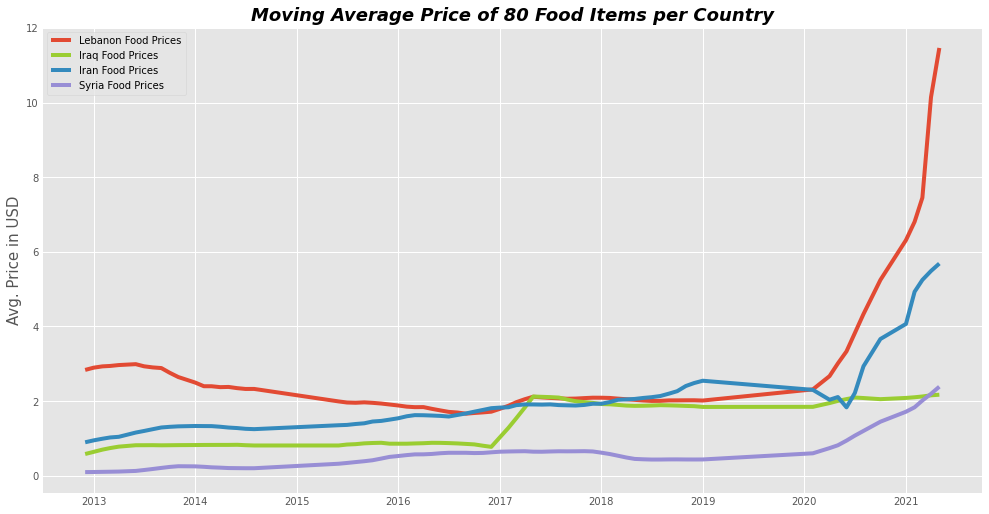

In [41]:
plt.style.use('ggplot')
plt.figure(figsize = (15,8))
plt.plot(ma_food_data['Lebanon'], label = 'Lebanon Food Prices')
plt.plot(ma_food_data['Iraq'], color = 'yellowgreen', label = 'Iraq Food Prices')
plt.plot(ma_food_data['Iran'], label = 'Iran Food Prices')
plt.plot(ma_food_data['Syria'], label = 'Syria Food Prices')
plt.title('Moving Average Price of 80 Food Items per Country', fontname= 'sans-serif', fontsize=18,
            fontstyle='italic', fontweight='bold')
plt.ylabel('Avg. Price in USD', fontsize = 15)
plt.legend()
plt.savefig(r'food_per_country.jpeg', quality = 95)

## Let's do the same for Energy Prices
#### Iran only has input in the food category so we'll only consider the rest

In [42]:
local_data

,country_id,country_name,product_name,cur_id,cur_name,um_name,month,year,price,dollar_price
0,117.0,Iran,Rice (local) - Retail,IRR,5,KG,4,2012,26860.0,0.64464
1,117.0,Iran,Rice (local) - Retail,IRR,5,KG,5,2012,27000.0,0.64800
2,117.0,Iran,Rice (local) - Retail,IRR,5,KG,6,2012,27000.0,0.64800
3,117.0,Iran,Rice (local) - Retail,IRR,5,KG,7,2012,27000.0,0.64800
4,117.0,Iran,Rice (local) - Retail,IRR,5,KG,8,2012,27000.0,0.64800
...,...,...,...,...,...,...,...,...,...,...
177268,238.0,Syria,Hand sanitizer (gel) - Retail,SYP,166,50 ML,5,2021,1000.0,0.79500
177269,238.0,Syria,Plastic gloves - Retail,SYP,167,Pair,5,2021,600.0,0.47700
177270,238.0,Syria,Internet bundle - Retail,SYP,168,1 GB,5,2021,2750.0,2.18625
177271,238.0,Syria,"Fuel (diesel, heating, parallel market) - Retail",SYP,15,L,5,2021,1650.0,1.31175


In [43]:
# Extract energy items
energy_data = local_data[local_data['product_name'].isin(energy)]
energy_data['date'] = pd.to_datetime(energy_data[['month', 'year']].assign(DAY = 1))

In [44]:
energy_data

,country_id,country_name,product_name,cur_id,cur_name,um_name,month,year,price,dollar_price,date
1249,118.0,Iraq,Fuel (kerosene) - Retail,IQD,15,L,8,2017,500.0,0.34000,2017-08-01
1250,118.0,Iraq,Fuel (kerosene) - Retail,IQD,15,L,9,2017,500.0,0.34000,2017-09-01
1251,118.0,Iraq,Fuel (kerosene) - Retail,IQD,15,L,7,2018,500.0,0.34000,2018-07-01
1252,118.0,Iraq,Fuel (kerosene) - Retail,IQD,15,L,9,2018,250.0,0.17000,2018-09-01
1253,118.0,Iraq,Fuel (kerosene) - Retail,IQD,15,L,10,2018,475.0,0.32300,2018-10-01
...,...,...,...,...,...,...,...,...,...,...,...
177242,238.0,Syria,Fuel (diesel) - Retail,SYP,15,L,5,2021,200.0,0.15900,2021-05-01
177246,238.0,Syria,Fuel (gas) - Retail,SYP,43,25 KG,5,2021,3850.0,3.06075,2021-05-01
177261,238.0,Syria,"Fuel (gas, parallel market) - Retail",SYP,43,25 KG,5,2021,27500.0,21.86250,2021-05-01
177271,238.0,Syria,"Fuel (diesel, heating, parallel market) - Retail",SYP,15,L,5,2021,1650.0,1.31175,2021-05-01


In [45]:
energy_data = energy_data[['country_name', 'product_name', 'cur_id', 'dollar_price', 'date']]

In [46]:
local_energy_data = energy_data.groupby('date').agg({'dollar_price':'mean'})
local_energy_data.head()

,dollar_price
date,
2013-05-01,0.772877
2013-06-01,0.826036
2013-07-01,0.901599
2013-08-01,0.887617
2013-09-01,0.906053


In [47]:
moving_avg(local_energy_data)

,dollar_price,moving_average
date,,
2013-09-01,0.906053,0.858836
2013-10-01,0.862383,0.876738
2013-11-01,0.829870,0.877505
2013-12-01,0.890372,0.875259
2014-01-01,0.912715,0.880279
...,...,...
2021-02-01,6.345433,5.481086
2021-03-01,7.302028,6.048644
2021-04-01,7.627485,6.609191


### Plot the mean of energy prices 

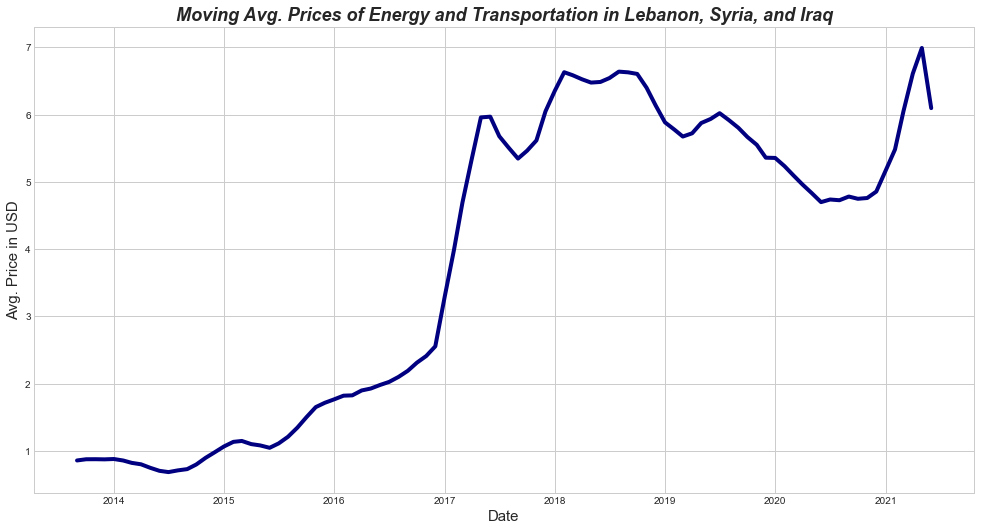

In [48]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (15,8))
sns.lineplot(x = local_energy_data.index, y = local_energy_data['moving_average'], color = 'navy')
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Avg. Price in USD', fontsize= 15)
plt.title('Moving Avg. Prices of Energy and Transportation in Lebanon, Syria, and Iraq', fontname= 'sans-serif', fontsize=18,
            fontstyle='italic', fontweight='bold')
plt.savefig(r'total_energy_prices.jpeg', quality = 95)
plt.show()

### Analyze energy data for each country

In [49]:
lebanon_energy_data = energy_data[energy_data['country_name'] == 'Lebanon']
iraq_energy_data    = energy_data[energy_data['country_name'] == 'Iraq']
syria_energy_data   = energy_data[energy_data['country_name'] == 'Syria']

In [50]:
lebanon_energy_data = lebanon_energy_data.groupby('date').agg({'dollar_price' : 'mean'})
iraq_energy_data    = iraq_energy_data.groupby('date').agg({'dollar_price' : 'mean'})
syria_energy_data   = syria_energy_data.groupby('date').agg({'dollar_price' : 'mean'})

In [51]:
moving_avg(lebanon_energy_data)
moving_avg(iraq_energy_data)
moving_avg(syria_energy_data)

,dollar_price,moving_average
date,,
2013-09-01,0.906053,0.858836
2013-10-01,0.862383,0.876738
2013-11-01,0.829870,0.877505
2013-12-01,0.890372,0.875259
2014-01-01,0.912715,0.880279
...,...,...
2021-01-01,4.543459,3.481438
2021-02-01,4.588263,3.807217
2021-03-01,5.083442,4.262846


In [52]:
lebanon_energy_data.drop(columns = ['dollar_price'], axis = 1 , inplace = True)
lebanon_energy_data.columns = ['leb_moving_average']
syria_energy_data.drop(columns = ['dollar_price'], axis = 1 , inplace = True)
syria_energy_data.columns = ['syr_moving_average']
iraq_energy_data.drop(columns = ['dollar_price'], axis = 1 , inplace = True)
iraq_energy_data.columns = ['irq_moving_average']

In [53]:
ma_energy_data = pd.DataFrame()
ma_energy_data['Lebanon'] = lebanon_energy_data['leb_moving_average']
ma_energy_data['Syria']   = syria_energy_data['syr_moving_average']
ma_energy_data['Iraq']    = iraq_energy_data['irq_moving_average']
ma_energy_data.index = lebanon_energy_data.index
ma_energy_data.head()

,Lebanon,Syria,Iraq
date,,,
2017-05-01,11.7920,2.323421,1.801665
2017-06-01,11.6336,2.423695,1.802437
2017-07-01,11.3652,2.508957,1.819356
2017-08-01,11.2596,2.544424,1.856383
2017-09-01,11.3520,2.585432,1.873469


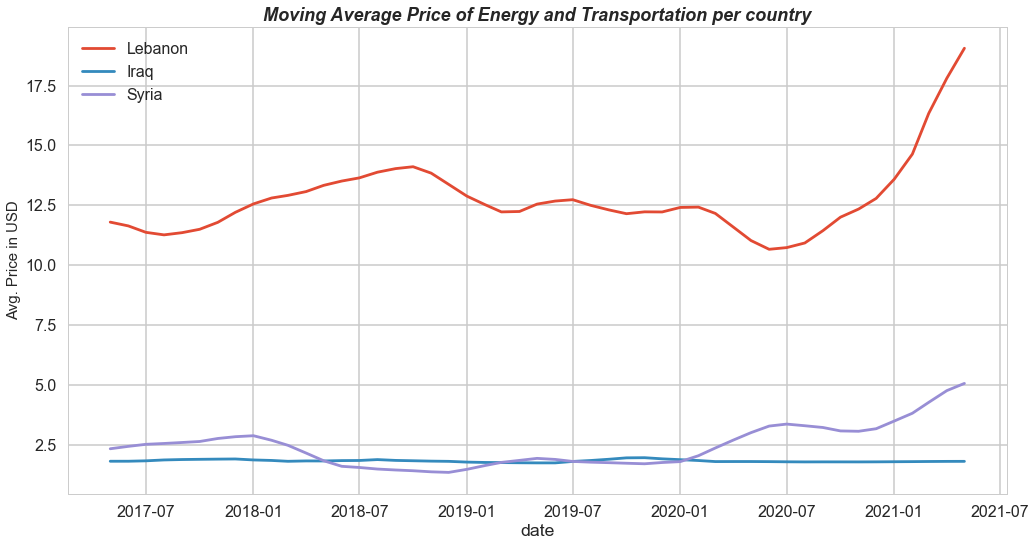

In [54]:
plt.style.use('seaborn-poster')
plt.figure(figsize = (15,8))
sns.lineplot(x = ma_energy_data.index, y = ma_energy_data['Lebanon'],label = 'Lebanon')
sns.lineplot(x = ma_energy_data.index, y = ma_energy_data['Iraq'], label = 'Iraq')
sns.lineplot(x = ma_energy_data.index, y = ma_energy_data['Syria'], label = 'Syria')
plt.title('Moving Average Price of Energy and Transportation per country', fontname= 'sans-serif', fontsize=18,
            fontstyle='italic', fontweight='bold')
plt.ylabel('Avg. Price in USD', fontsize = 15)
plt.legend()
plt.savefig(r'energy_per_country.jpeg', quality = 95)
plt.show()

## Same exercise for Hygiene Prices
#### Only Syria and Iraq has hygiene data

In [55]:
hyg_data = local_data[local_data['product_name'].isin(hygiene)]
hyg_data['date'] = pd.to_datetime(hyg_data[['month', 'year']].assign(DAY = 1))
hyg_data = hyg_data[['country_name', 'product_name', 'cur_id', 'dollar_price', 'date']]
local_hyg_data = hyg_data.groupby('date').agg({'dollar_price':'mean'})
moving_avg(local_hyg_data)
local_hyg_data.head()

,dollar_price,moving_average
date,,
2020-07-01,1.297846,1.114841
2020-08-01,1.416747,1.080857
2020-09-01,1.374473,1.220034
2020-10-01,1.470125,1.373148
2020-11-01,1.472340,1.406306


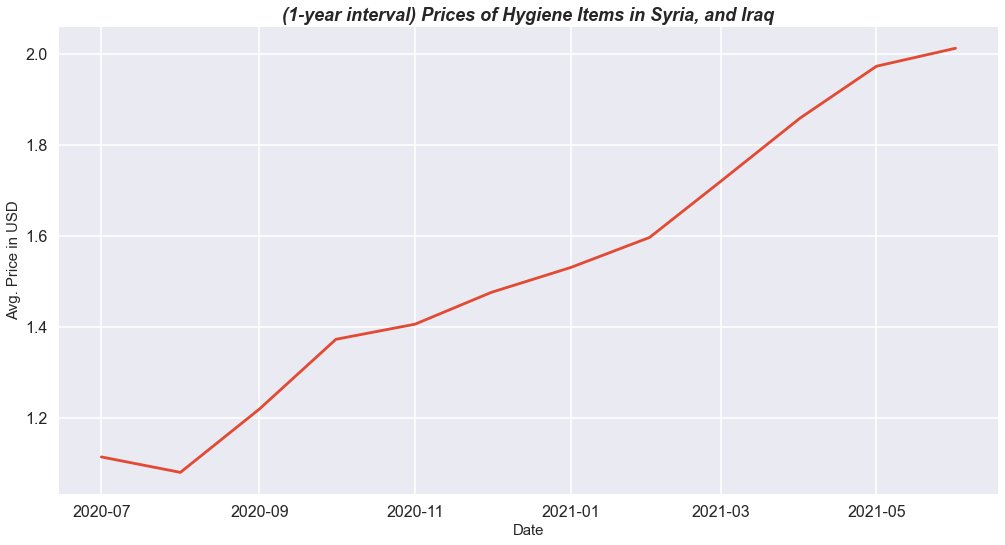

In [56]:
plt.figure(figsize = (15,8))
plt.style.use('seaborn-darkgrid')
sns.lineplot(x = local_hyg_data.index, y = local_hyg_data['moving_average'])
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Avg. Price in USD', fontsize= 15)
plt.title('(1-year interval) Prices of Hygiene Items in Syria, and Iraq', fontname= 'sans-serif', fontsize=18,
            fontstyle='italic', fontweight='bold')
plt.savefig(r'total_hyg.jpeg', quality = 95)

### Analysis of hygiene data for individual countries

In [57]:
iraq_hyg_data  = hyg_data[hyg_data['country_name'] == 'Iraq']
syria_hyg_data = hyg_data[hyg_data['country_name'] == 'Syria']

In [58]:
iraq_hyg_data  = iraq_hyg_data.groupby('date').agg({'dollar_price' : 'mean'})
syria_hyg_data = syria_hyg_data.groupby('date').agg({'dollar_price' : 'mean'})

In [59]:
moving_avg(iraq_hyg_data)
moving_avg(syria_hyg_data)

,dollar_price,moving_average
date,,
2020-08-01,1.349668,0.920160
2020-09-01,1.302147,1.102855
2020-10-01,1.416749,1.304080
2020-11-01,1.416127,1.338894
2020-12-01,1.618007,1.420540
2021-01-01,1.658724,1.482351
2021-02-01,1.679889,1.557899
2021-03-01,2.121026,1.698755
2021-04-01,2.206459,1.856821


In [60]:
syria_hyg_data.drop(columns = ['dollar_price'], axis = 1 , inplace = True)
syria_hyg_data.columns      = ['syr_moving_average']
iraq_hyg_data.drop(columns  = ['dollar_price'], axis = 1 , inplace = True)
iraq_hyg_data.columns       = ['irq_moving_average']

In [61]:
ma_hyg_data = pd.DataFrame()
ma_hyg_data['Syria'] = syria_hyg_data['syr_moving_average']
ma_hyg_data['Iraq']  = iraq_hyg_data['irq_moving_average']
ma_hyg_data.index    = syria_hyg_data.index
ma_hyg_data.head()

,Syria,Iraq
date,,
2020-08-01,0.920160,1.680064
2020-09-01,1.102855,1.712511
2020-10-01,1.304080,1.737397
2020-11-01,1.338894,1.762677
2020-12-01,1.420540,1.772971


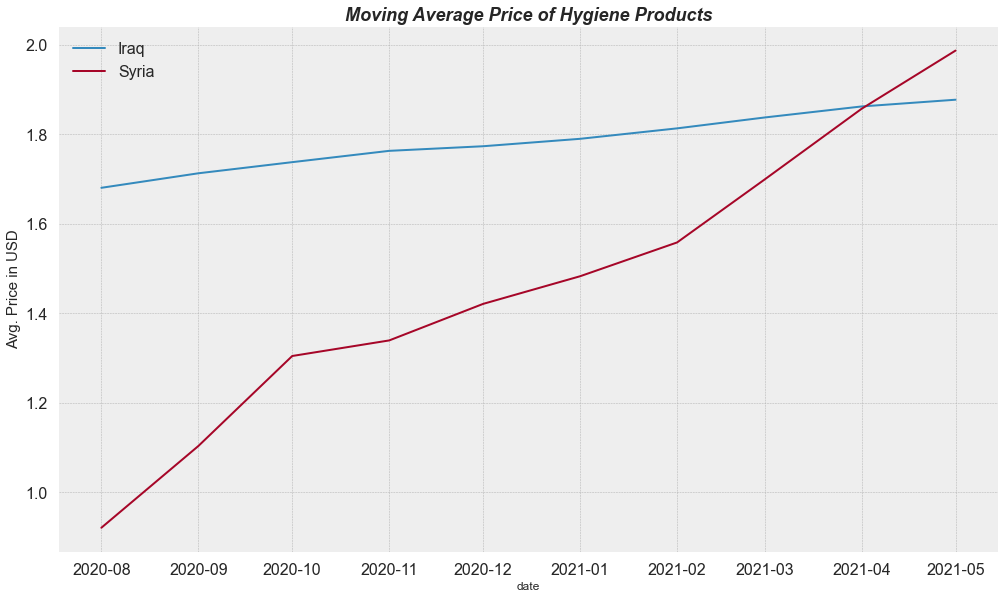

In [62]:
plt.style.use('bmh')
plt.figure(figsize = (15,9))
sns.lineplot(x = ma_hyg_data.index, y = ma_hyg_data['Iraq'], label = 'Iraq')
sns.lineplot(x = ma_hyg_data.index, y = ma_hyg_data['Syria'], label = 'Syria')
plt.title('Moving Average Price of Hygiene Products', fontname= 'sans-serif', fontsize=18,
            fontstyle='italic', fontweight='bold')
plt.ylabel('Avg. Price in USD', fontsize = 15)
plt.legend()
plt.savefig(r'hyg_per_country.jpeg', quality = 95)
plt.show()

### I can visually see the changes in the regional economy, especially after Covid. We need to further investigate the ties in these markets and how they affect each other (other than the obvious proximity and people commonalities) 
## Thank you for reading through!